## Enhanced Fraud Detection System Model for E-Commerce and Banking Transactions Using Machine Learning
## Overview
This challenge focuses on building robust machine learning models for fraud detection in e-commerce and banking transactions. The project will involve analyzing, preprocessing, and integrating transaction data from both domains, engineering fraud-related features, and training multiple machine learning and deep learning models to detect fraudulent activity. The challenge also includes using geolocation and transaction pattern analysis to improve detection accuracy.

Participants will develop real-time fraud detection systems, ensuring efficiency and scalability in deployment. The project aims to deliver a fully operational fraud detection pipeline that includes model explainability, API deployment, and interactive dashboards.

## Objective
The primary objective of this challenge is to improve the detection of fraud cases in e-commerce and bank credit transactions by:

- Developing machine learning models to identify fraudulent patterns in both e-commerce and credit card transactions.
- Implementing geolocation analysis using IP address mappings and transaction pattern recognition.
- Enhancing model explainability through tools like SHAP and LIME for transparency in fraud detection.
- Deploying models in real-time using Flask, Docker, and developing APIs for serving fraud predictions.
- Creating an interactive dashboard with Dash to visualize fraud trends, fraud hotspots, and summary insights from transaction data.

## 1. Data Colllection

### Import Necessary Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [2]:
fraud_data = pd.read_csv("../data/Fraud_Data.csv")
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
creditcard_data = pd.read_csv("../data/creditcard.csv")
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
IpAddress_data = pd.read_csv("../data/IpAddress_to_Country.csv")
IpAddress_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


## 2. Data Preprocessing

#### 2.1 Stastical data descrpition

In [5]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [6]:
fraud_data.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [7]:
fraud_data['class'].value_counts()

class
0    136961
1     14151
Name: count, dtype: int64

In [8]:
IpAddress_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [9]:
IpAddress_data.describe()

,lower_bound_ip_address,upper_bound_ip_address
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [10]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
creditcard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


2.2 Handling Missing Values

In [12]:
print("Missing values of fraud data", fraud_data.isnull().sum())
print("missing values of IpAddress to country",IpAddress_data.isnull().sum())
print("Missing values of Credit score data", creditcard_data.isnull().sum())

Missing values of fraud data user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
missing values of IpAddress to country lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
Missing values of Credit score data Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


since the three dataset are free from missing values

### 2.3 Data cleaning

#### Remove duplicates

In [13]:
# Check for duplicates in each dataset
print("Fraud_Data duplicates: ", fraud_data.duplicated().sum())
print("Creditcard_Data duplicates: ", creditcard_data.duplicated().sum())
print("IpAddress_Data duplicates: ", IpAddress_data.duplicated().sum())

Fraud_Data duplicates:  0
Creditcard_Data duplicates:  1081
IpAddress_Data duplicates:  0


In [14]:
# Remove duplicates if they exist
creditcard_data = creditcard_data.drop_duplicates()
print("Creditcard_Data cleaned duplicates: ", creditcard_data.duplicated().sum())

Creditcard_Data cleaned duplicates:  0


#### Correct data types

In [15]:
# Check data types of each dataset
print("Fraud_Data data types:\n", fraud_data.dtypes)
print("\nCreditcard_Data data types:\n", creditcard_data.dtypes)
print("\nIpAddress_Data data types:\n", IpAddress_data.dtypes)

Fraud_Data data types:
 user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

Creditcard_Data data types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

IpAddress_Data data types:
 lower_bound_ip_address    float64
upper_bound

In [16]:
# Convert 'signup_time' and 'purchase_time' to datetime in Fraud_Data
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Convert 'ip_address' from float64 to int64 in Fraud_Data
fraud_data['ip_address'] = fraud_data['ip_address'].astype('int64')

# Convert 'lower_bound_ip_address' to int in IpAddress_Data
IpAddress_data['lower_bound_ip_address'] = IpAddress_data['lower_bound_ip_address'].astype('int64')

# Verifying the changes
print("Updated Fraud_Data data types:\n", fraud_data.dtypes)
print("\nUpdated IpAddress_Data data types:\n", IpAddress_data.dtypes)

Updated Fraud_Data data types:
 user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address                 int64
class                      int64
dtype: object

Updated IpAddress_Data data types:
 lower_bound_ip_address     int64
upper_bound_ip_address     int64
country                   object
dtype: object


## 3. Exploratory Data Analysis (EDA)

#### 3.1 Univariate analysis

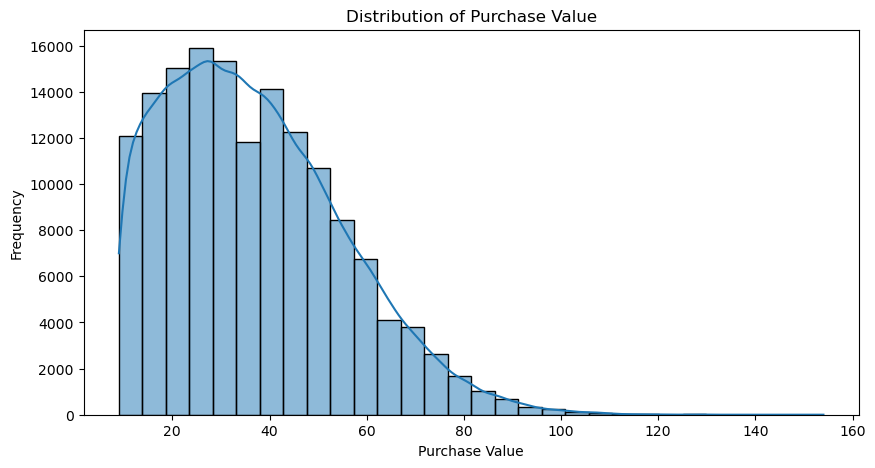

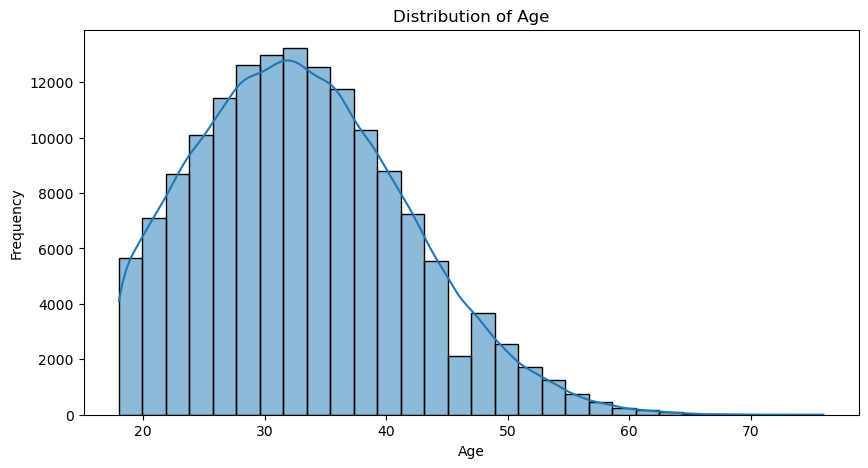

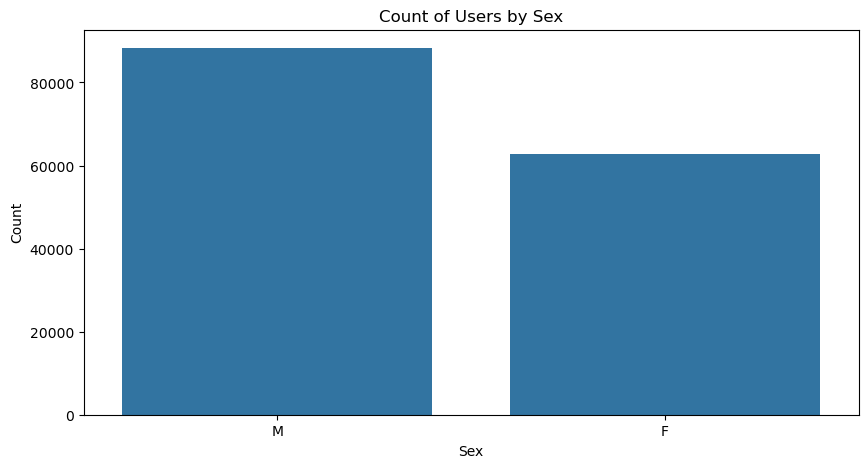

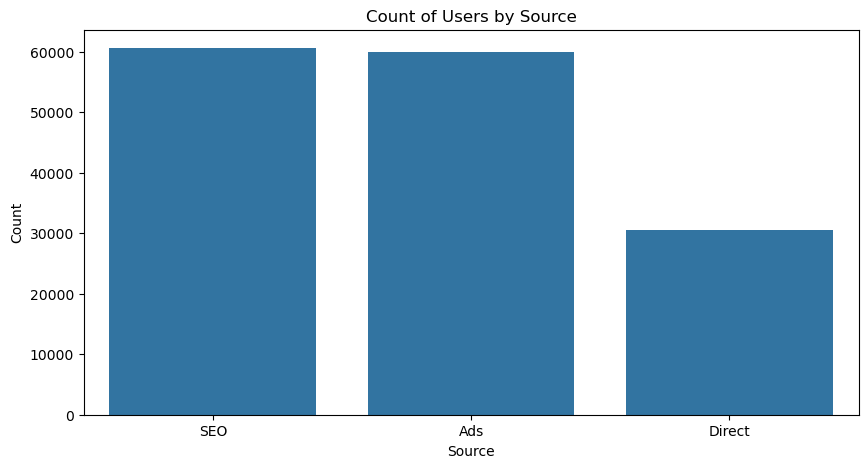

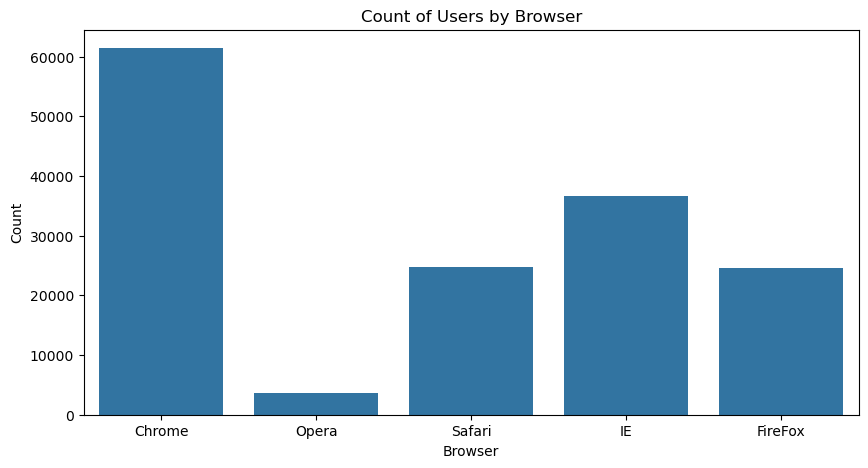

In [17]:
# Univariate Analysis for Fraud_Data
# Histogram for purchase_value
plt.figure(figsize=(10, 5))
sns.histplot(fraud_data['purchase_value'], bins=30, kde=True)
plt.title('Distribution of Purchase Value')
plt.xlabel('Purchase Value')
plt.ylabel('Frequency')
plt.show()

# Histogram for age
plt.figure(figsize=(10, 5))
sns.histplot(fraud_data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Count plot for categorical features
plt.figure(figsize=(10, 5))
sns.countplot(data=fraud_data, x='sex')
plt.title('Count of Users by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=fraud_data, x='source')
plt.title('Count of Users by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=fraud_data, x='browser')
plt.title('Count of Users by Browser')
plt.xlabel('Browser')
plt.ylabel('Count')
plt.show()


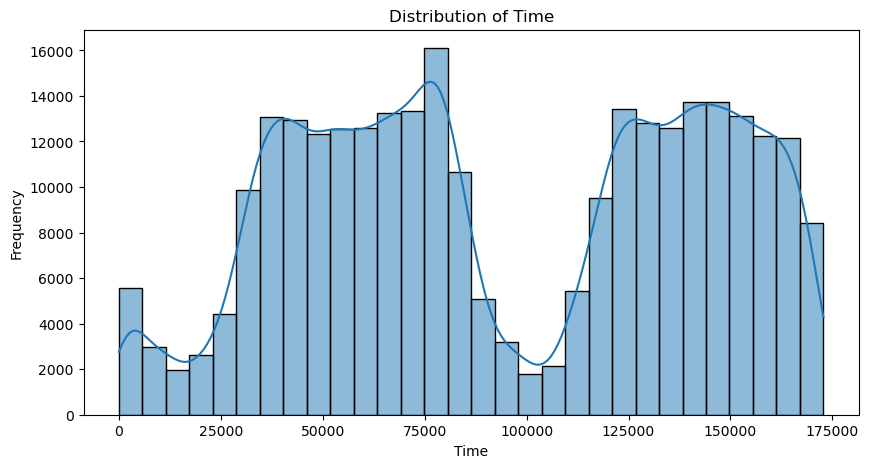

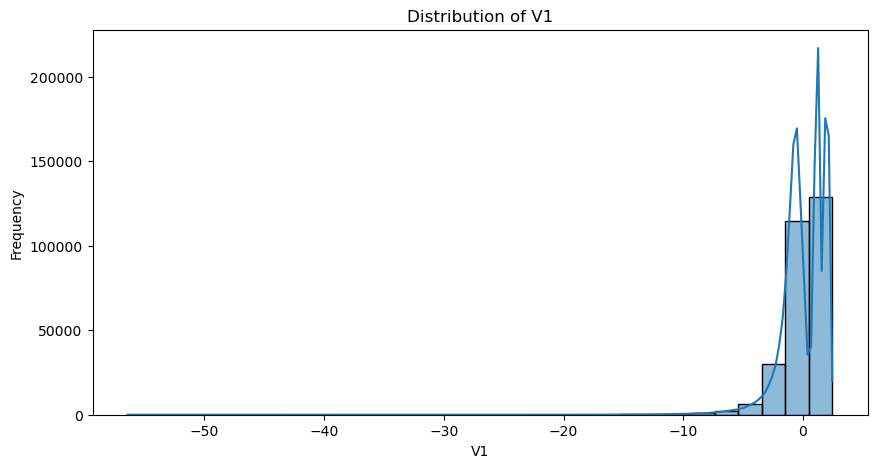

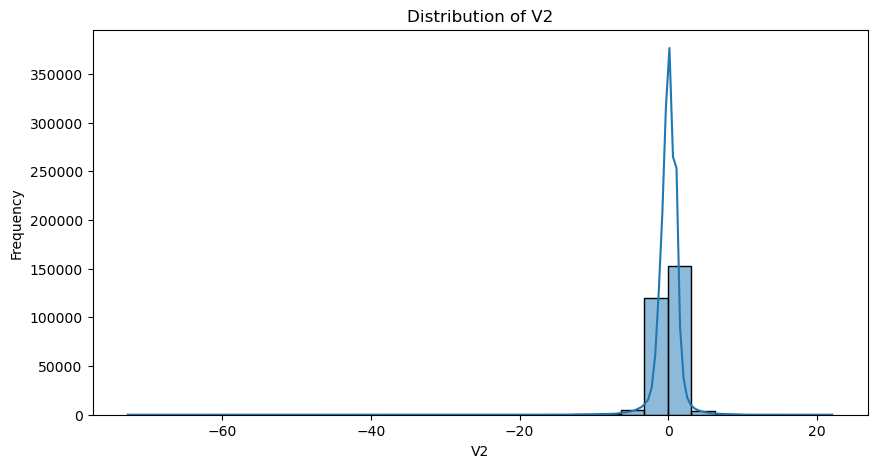

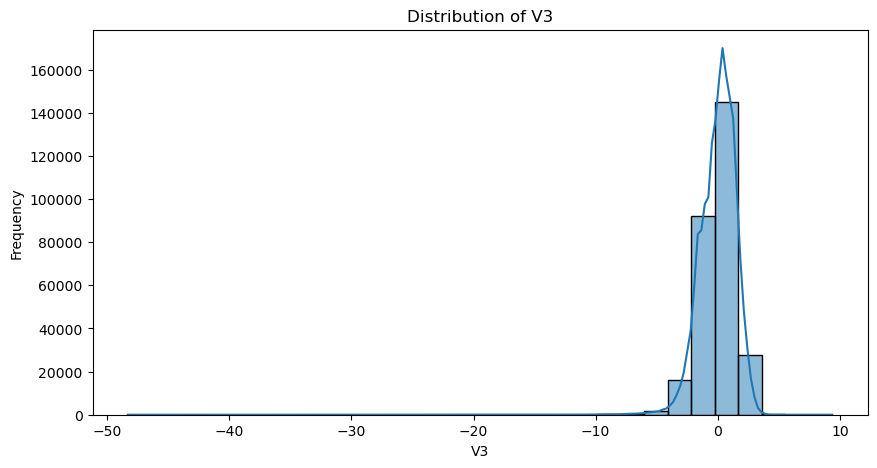

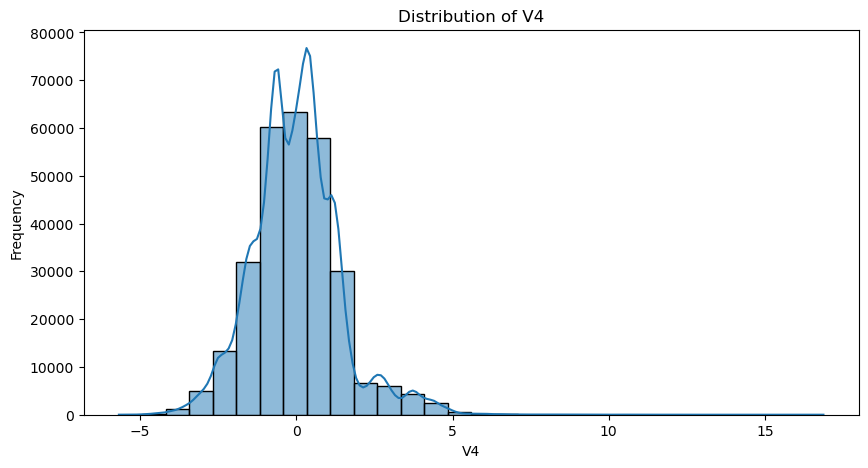

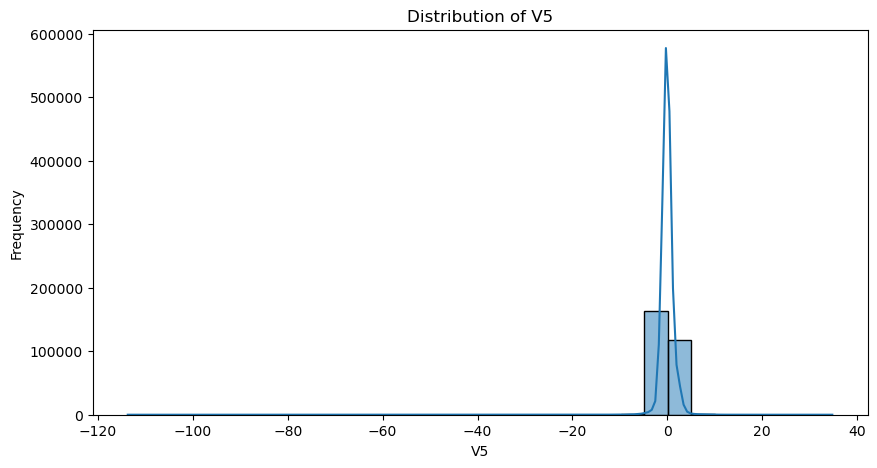

In [18]:
# Univariate Analysis for Creditcard_Data
# Histogram for Time
plt.figure(figsize=(10, 5))
sns.histplot(creditcard_data['Time'], bins=30, kde=True)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# Histograms for V1 to V5 as an example
for col in creditcard_data.columns[1:6]:  # Adjust column indices as necessary
    plt.figure(figsize=(10, 5))
    sns.histplot(creditcard_data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


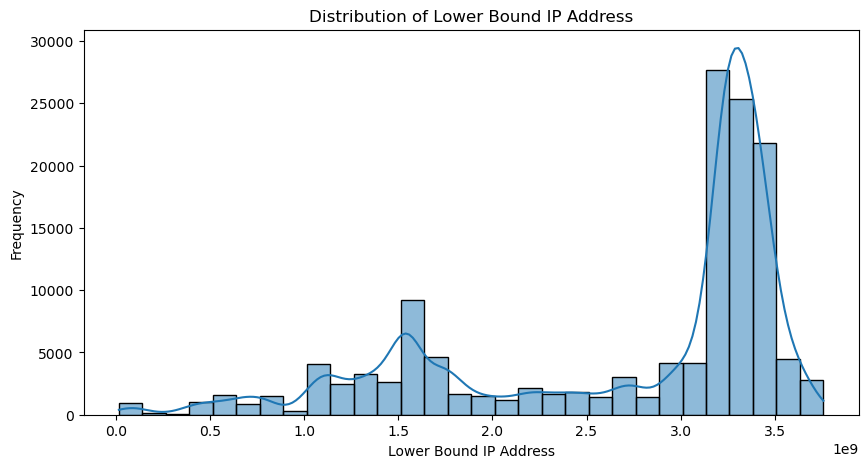

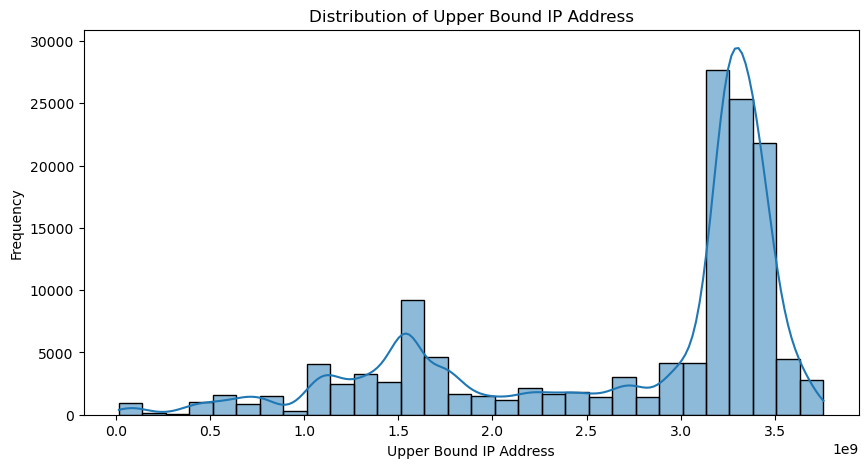

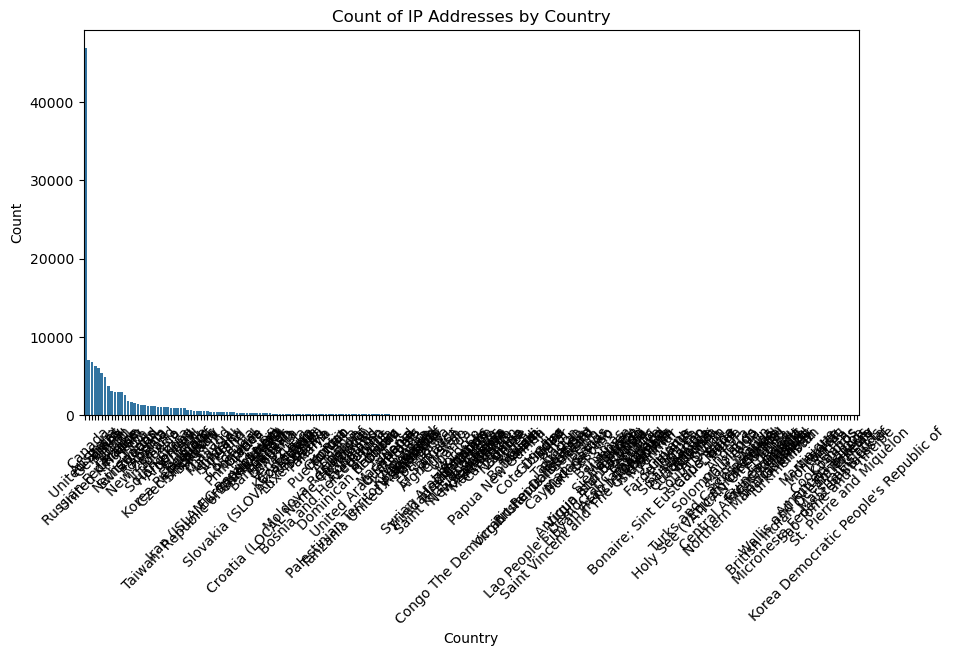

In [19]:
# Univariate Analysis for IpAddress_Data
# Histogram for lower_bound_ip_address
plt.figure(figsize=(10, 5))
sns.histplot(IpAddress_data['lower_bound_ip_address'], bins=30, kde=True)
plt.title('Distribution of Lower Bound IP Address')
plt.xlabel('Lower Bound IP Address')
plt.ylabel('Frequency')
plt.show()

# Histogram for upper_bound_ip_address
plt.figure(figsize=(10, 5))
sns.histplot(IpAddress_data['upper_bound_ip_address'], bins=30, kde=True)
plt.title('Distribution of Upper Bound IP Address')
plt.xlabel('Upper Bound IP Address')
plt.ylabel('Frequency')
plt.show()

# Count plot for country
plt.figure(figsize=(10, 5))
sns.countplot(data=IpAddress_data, x='country', order=IpAddress_data['country'].value_counts().index)
plt.title('Count of IP Addresses by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#### 3.2 Bivariate analysis